# Arab-Andalusian Collection - API demo notebook
This notebook is meant to act as a tutorial to discover the Andalusian API from Dunya and a small experiment showing an application of the available material.

## Import libraries

In [4]:
import json
import os
import music21
import matplotlib.pyplot as plt
import numpy as np
from compmusic import dunya

dunya.set_token("SET_YOUR_DUNYA_TOKEN")


## Dataset metada
Few examples of useful applications of functions from the Andalusian API

In [2]:
# Get specific information about a recording.
dunya.andalusian.get_recording("a451a7fc-c53f-462a-b3fc-4377bb588105")

{'mbid': 'a451a7fc-c53f-462a-b3fc-4377bb588105',
 'title': 'بطايحي الماية',
 'transliterated_title': '',
 'musescore_url': '',
 'archive_url': '',
 'sections': []}

In [3]:
# Get a list of Andalusian nawbas in the database
dunya.andalusian.get_nawbas()

[]

## Downloading audio

In [ ]:
# Download the mp3 audio file for a specific recording from its mbid
path = "SET THE PATH TO DOWNLOAD THE REQUIRED AUDIO"
mbid = "a451a7fc-c53f-462a-b3fc-4377bb588105"
dunya.andalusian.download_mp3(mbid, path)

## Downloading scores

In [5]:
# Download the xml score file for a specific recording from its mbid
path = "SET PATH TO DOWNLOAD THE FILE"
mbid = "a451a7fc-c53f-462a-b3fc-4377bb588105"
dunya.andalusian.download_xml(mbid, path)

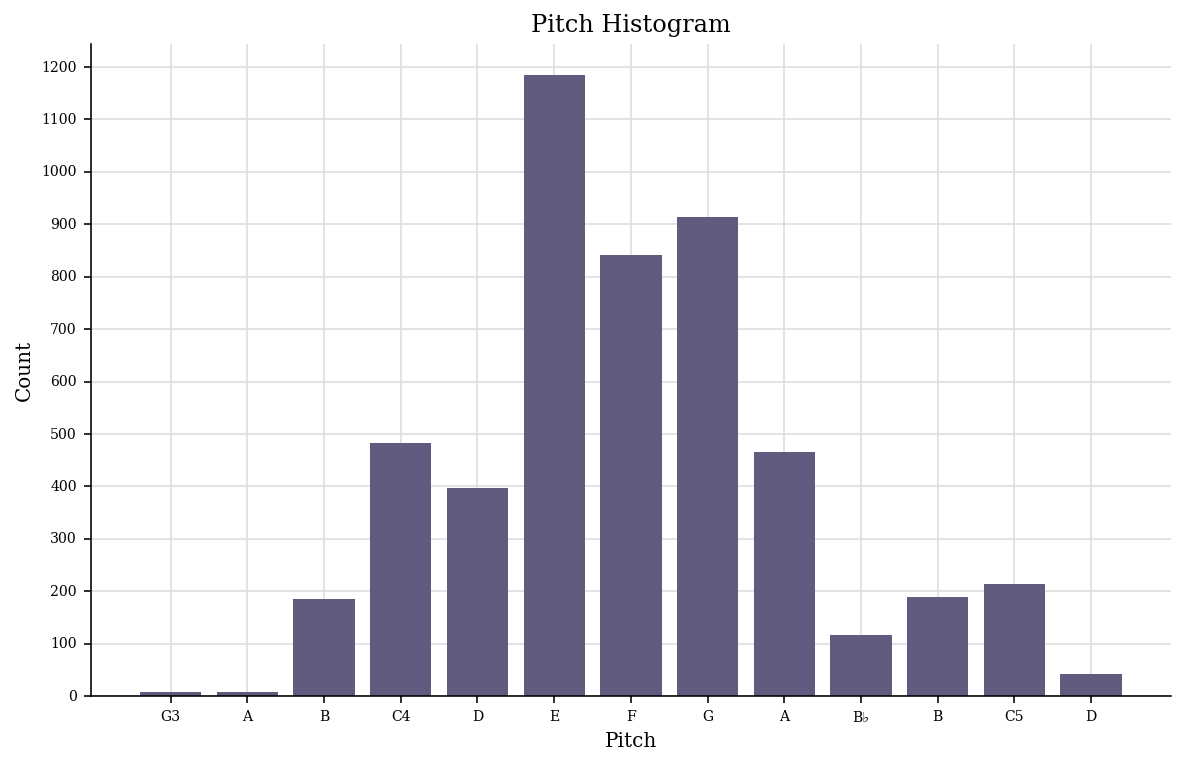

In [10]:
# Compute pitch histogram of the score
s = music21.converter.parse(os.path.join(path,mbid+".xml"))
s.plot('histogram', 'pitch')

## Downloading lyrics

In [3]:
# Download the lyrics file for a specific recording from its mbid
path = "SET THE PATH TO DOWNLOAD THE REQUIRED LYRICS"
mbid = "a451a7fc-c53f-462a-b3fc-4377bb588105"
dunya.andalusian.download_lyrics(mbid, path)

In [13]:
# Open the downloaded file
with open(os.path.join(path,mbid+'_lyrics.json')) as json_file:  
    data = json.load(json_file)
data = json.loads(data)
data = data[0]['transliterated']
# Show some important parameters of the lyrics file
print("Number os sanaa's: ", len(data))
forms={}
for x in data:
    if x['poem'] not in forms:
        forms[x['poem']] = 1
    else:
        forms[x['poem']] += 1

print("The statistic of the poetry froms of the sanaa's are: ", forms)

Number os sanaa's:  11
The statistic of the poetry froms of the sanaa's are:  {'zajal': 8, 'qaṣīdah': 1, 'tawshīḥ': 2}


## Downloading pitch tracks

In [47]:
# Download pitch track of a recording from its mbid
path = "SET THE PATH TO DOWNLOAD THE REQUIRED PITCH TRACK"
mbid = "a451a7fc-c53f-462a-b3fc-4377bb588105"
dunya.andalusian.download_pitch_track(mbid, path)

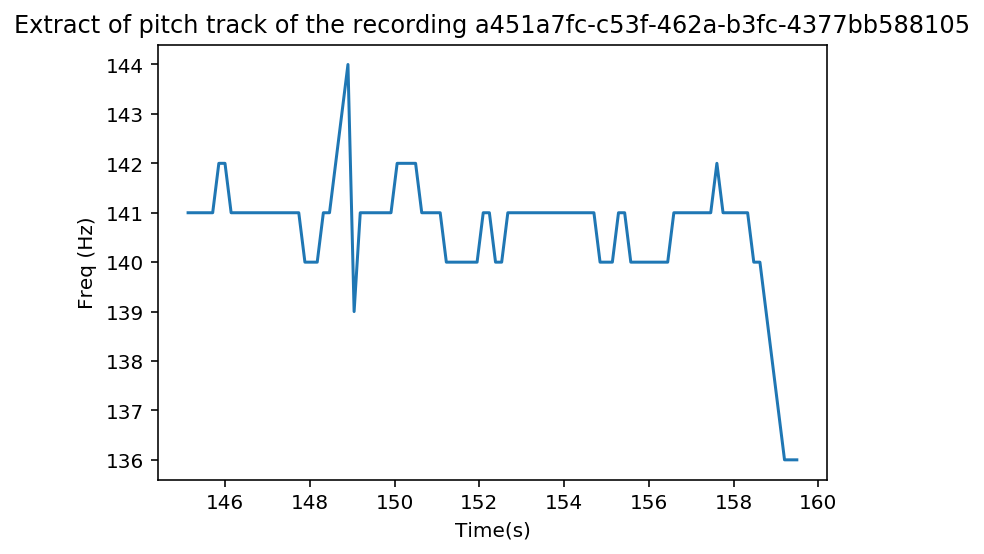

In [126]:
# Represent the pitch track of a specific period of time
settings = dunya.docserver.get_document_as_json(mbid, "andalusianpitch", subtype="settings")
with open(os.path.join(path,mbid+'_pitchtrack.json')) as json_file:  
    pitch = json.load(json_file)
time_axis = np.linspace(0,(len(pitch)*settings['hopSize'])/(0.02*settings['sampleRate']),num = len(pitch))

plt.plot(time_axis[1000:1100],pitch[1000:1100])
plt.xlabel("Time(s)")
plt.ylabel('Freq (Hz)')
plt.title('Extract of pitch track of the recording ' + mbid)
plt.show()